In [1]:
GAUGE_LENGTH = 10
SAMPLES = 1000
MULT = 4.0838 
DAS_CNST = 116/8192*10**(-9)*SAMPLES/GAUGE_LENGTH

In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
import matplotlib.pyplot as plt
%matplotlib widget
from obspy import read
from scripts.surface_reflections_correction import mseed_upgoing, plot_up_down_original_mseed, plot_channel_traces_mseed
from scripts.picking_module import process_event
from scripts.raw_data_plot import plot_filled_timeseries

RAW_DATA_PATH = "/home/lulu/data/inci30"   
event_date = "20231001-2221"

picking = process_event(event_date, f"{RAW_DATA_PATH}/borehole", output_path=None)
start_time = picking['P_pick'] - 1
end_time = picking['S_pick'] + 2

In [4]:
input_mseed = f"{RAW_DATA_PATH}/fiber/{event_date}.mseed"
st = read(input_mseed, starttime=start_time, endtime=end_time)
output_mseed = f"{RAW_DATA_PATH}/fiber/upgoing/{event_date}.mseed"
st_up, st, st_down = mseed_upgoing(st)

100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 52945.12it/s]


Filtering channels: 100%|█████████████████| 1824/1824 [00:00<00:00, 2956.18it/s]


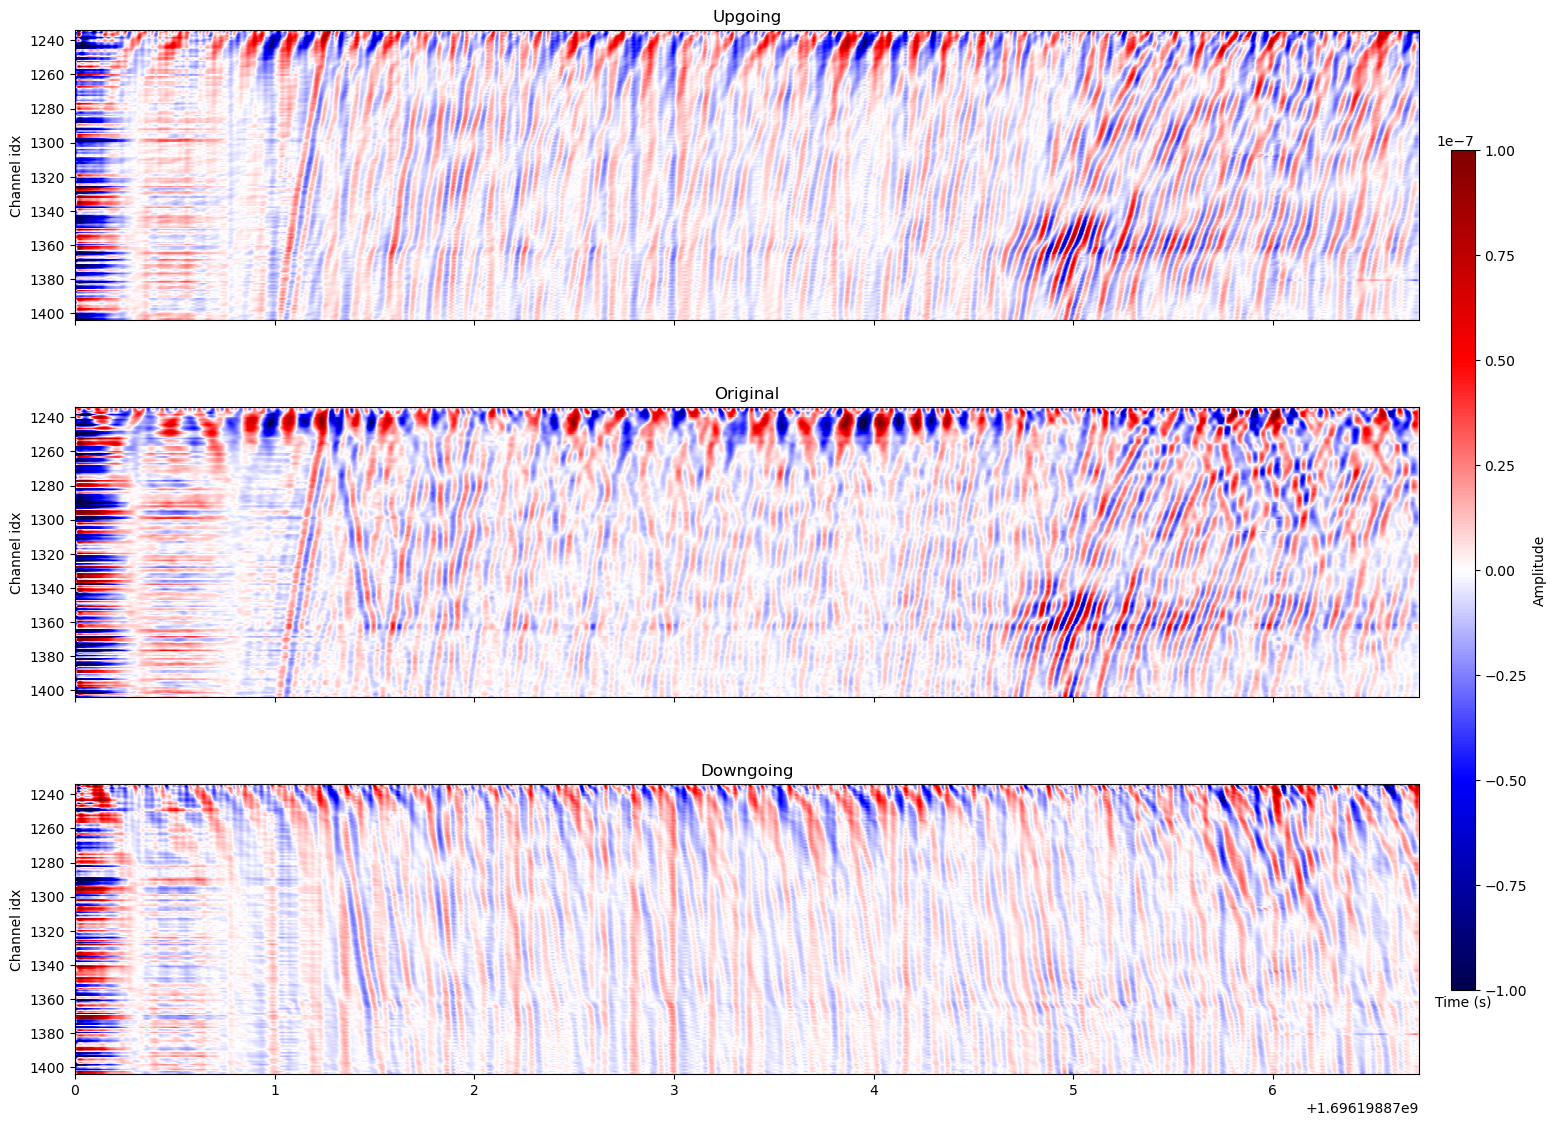

In [7]:
plot_up_down_original_mseed(st_up, st, st_down, ch_start=1234, ch_end=1404)

Filtering channels: 100%|█████████████████| 1824/1824 [00:00<00:00, 2945.25it/s]


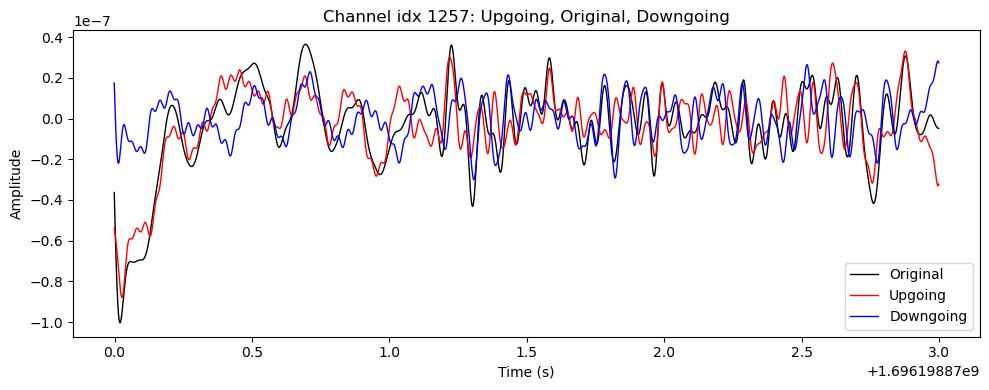

In [8]:
plot_channel_traces_mseed(st_up, st, st_down, channel_idx=1257, do_filter=True)